<a href="https://colab.research.google.com/github/NaraaBold/ComputerVision/blob/main/Image_filtering_and_convoluton_for_students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Image Convolutions**

Convolution is one of the most important concepts in signal processing and a precursor topic to understanding Convolutional Neural Networks.

**Convolution** is a general purpose filter effect for images.

In [ ]:
import numpy as np
from scipy.ndimage.filters import convolve1d

<ipython-input-1-c61bc7fdfd89>:2: DeprecationWarning: Please import `convolve1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import convolve1d


1D convolution

In [ ]:
a = np.array([1,2,1,1,0,1,2,2,1])
w = np.array([-1,1,2])
convolve1d(a,w)

array([ 1,  3,  4,  3,  1, -1,  2,  5,  4])

2D Convolution

In [ ]:
from scipy.ndimage.filters import convolve
A = np.ones((9,9)) # build matrix of 1's
A[2:-2,2:-2]=np.zeros((5,5)) # carve out the matrix of 0's
K = np.array([[1,1,1],
              [1,1,0],
              [1,0,0]])
print (A)
convolve(A,K)

**Common kernels for Image**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# TODO: Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'compVision/assignments/assignment1/'
FOLDERNAME = 'Colab Notebooks/Computer vision/assignments/assignment1'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
import os
sys.path.append('/content/drive/MyDrive/{}'.format(FOLDERNAME))
os.chdir('/content/drive/MyDrive/{}'.format(FOLDERNAME))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('')

# create figure to plot image to
plt.figure(figsize=(4,4))
plt.imshow(img)

Edge detection

To measure the change in pixel intensity we can look at how the colour value changes in both the x and y direction.

In [ ]:
Dx = np.array([1,0, -1], np.float32).reshape((3,1))
Dy = np.array([1, 0, -1], np.float32).reshape((1,3))
print(Dx)
print (Dy)

[[ 1.]
 [ 0.]
 [-1.]]
[[ 1.  0. -1.]]


In [ ]:
gray_img = rgb2gray(img)

img_Dx = ndimage.filters.convolve(gray_img,Dx)
img_Dy = ndimage.filters.convolve(gray_img,Dy)

# draw images
fig = plt.figure(figsize=(12,12))
fig.add_subplot(1,3,1)
plt.imshow(gray_img, cmap='gray')
plt.title("original")
fig.add_subplot(1,3,2)
plt.imshow(img_Dx, cmap='gray')
plt.title("Dx")
fig.add_subplot(1,3,3)
plt.imshow(img_Dy, cmap='gray')
plt.title("Dy")

In [ ]:
def diff_filters(img):
    ''' input: a gray scale image
       output: the gray scale edge detection image, and direction matrix theta'''
    Dx = np.array([1,0, -1], np.float32).reshape((3,1))
    Dy = np.array([1, 0, -1], np.float32).reshape((1,3))

    Ix = ndimage.filters.convolve(img, Dx)
    Iy = ndimage.filters.convolve(img, Dy)

    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)

    return (G, theta)

In [ ]:
img_diff = diff_filters(gray_img)[0]

# draw images
fig = plt.figure(figsize=(8,8))
fig.add_subplot(1,2,1)
plt.imshow(gray_img, cmap='gray')
plt.title("original")
fig.add_subplot(1,2,2)
plt.imshow(img_diff, cmap='gray')
plt.title("discrete differential")

Sobel filters

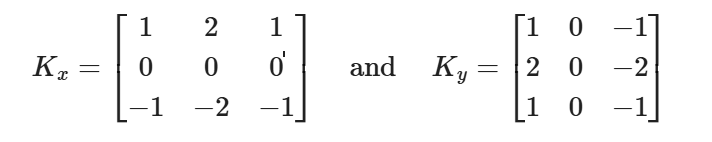

In [ ]:
def sobel_filters(img):
    ''' input: a gray scale image
       output: the gray scale edge detection image, and direction matrix theta'''
    Kx = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    Ky = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]], np.float32)

    Ix = ndimage.filters.convolve(img, Kx)
    Iy = ndimage.filters.convolve(img, Ky)

    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)

    return (G, theta)

In [ ]:
img_sobel = sobel_filters(gray_img)[0]

# draw images
fig = plt.figure(figsize=(8,8))
fig.add_subplot(1,2,1)
plt.imshow(gray_img, cmap='gray')
plt.title("original")
fig.add_subplot(1,2,2)
plt.imshow(img_sobel, cmap='gray')
plt.title("sobel")

**Apply following kernels:**

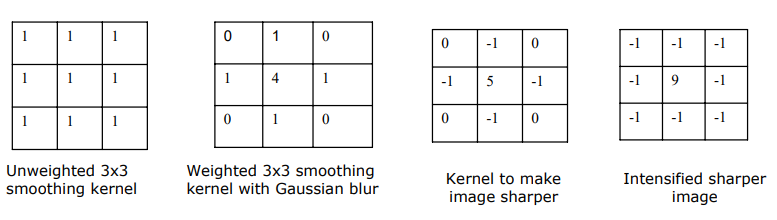

In [ ]:
#define your kernel
K = np.array("")

lur_img = convolve(gray_img, K)

# draw images
fig = plt.figure(figsize=(8,8))
fig.add_subplot(1,2,1)
plt.imshow(gray_img, cmap='gray')
plt.title("original")
fig.add_subplot(1,2,2)
plt.imshow(blur_img, cmap='gray')
plt.title("Blur")